# Heart Disease EDA

This Heart Disease database and general definition of each feature has been extracted from Kaggle website.

(https://www.kaggle.com/ronitf/heart-disease-uci)

## Attribute Information:

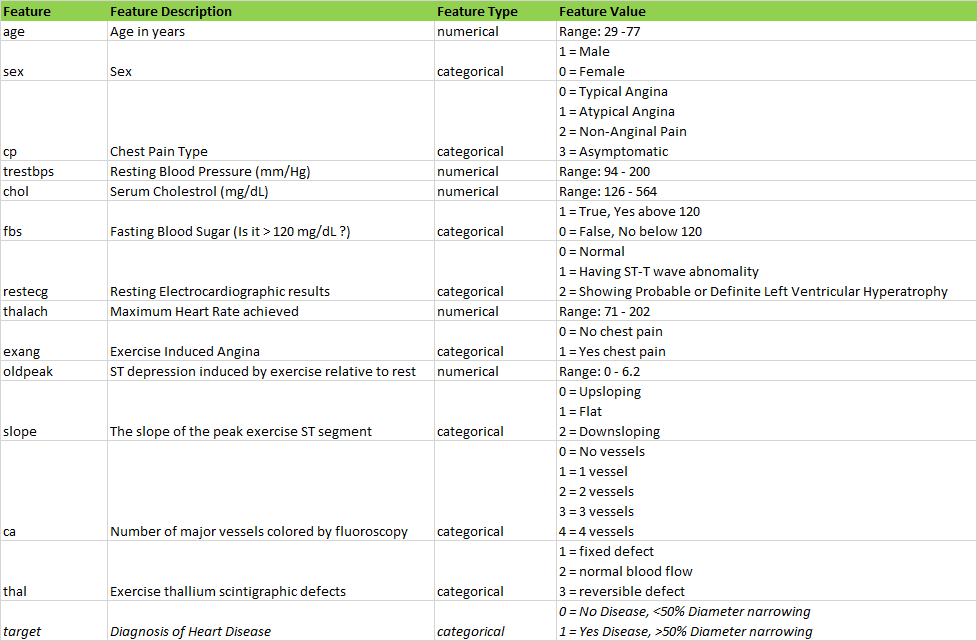

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read file into DataFrame and explore data attributes

In [2]:
data = pd.read_csv('./data/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isnull().sum() # Check for the number of missing values for each feature

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
# thal values is defined to be in {1,2,3} and  thal=0 maps to null in the original dataset.
data[data['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [8]:
# There are only two records with thal=0, so we drop these 2 rows.
data.drop(index=[48,281], inplace=True)

### Data Visualization

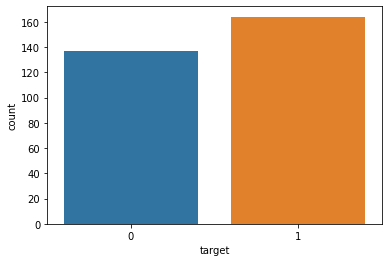

In [9]:
sns.countplot(x='target', data=data);

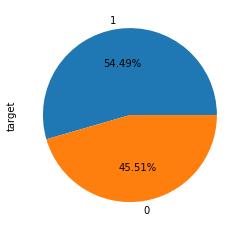

In [10]:
data['target'].value_counts().plot.pie(autopct='%.2f%%');

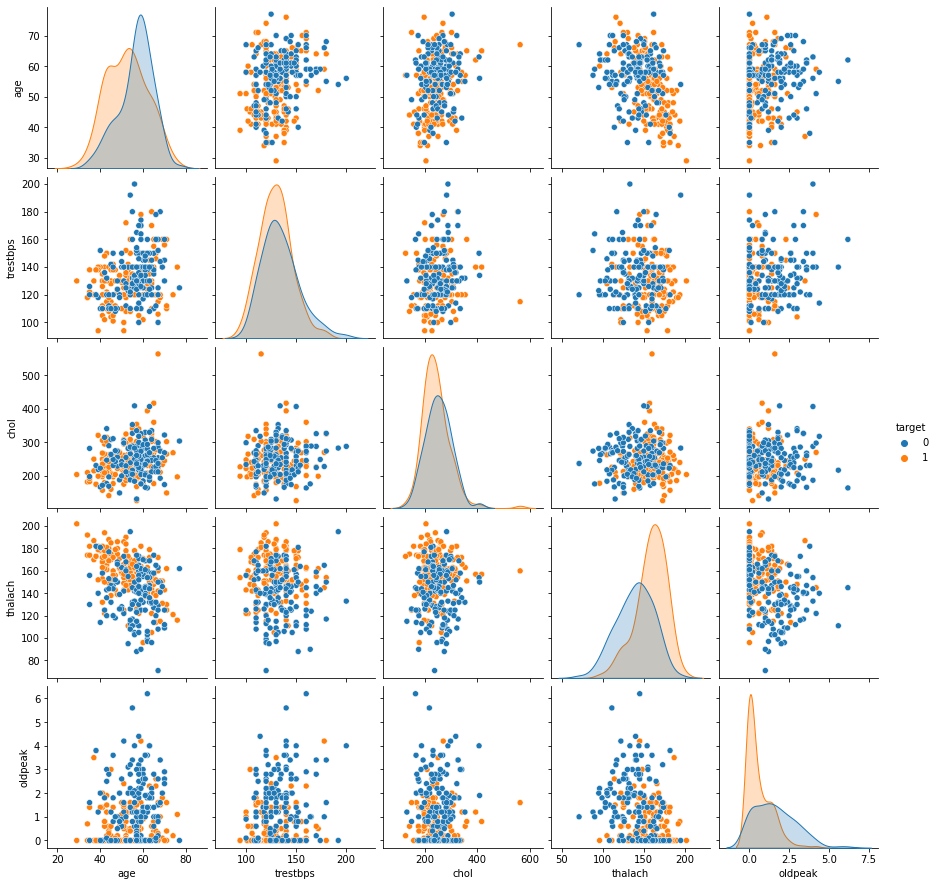

In [11]:
# all columns with continues values 
sns.pairplot(data[['age','trestbps', 'chol','thalach','oldpeak','target']], hue='target');

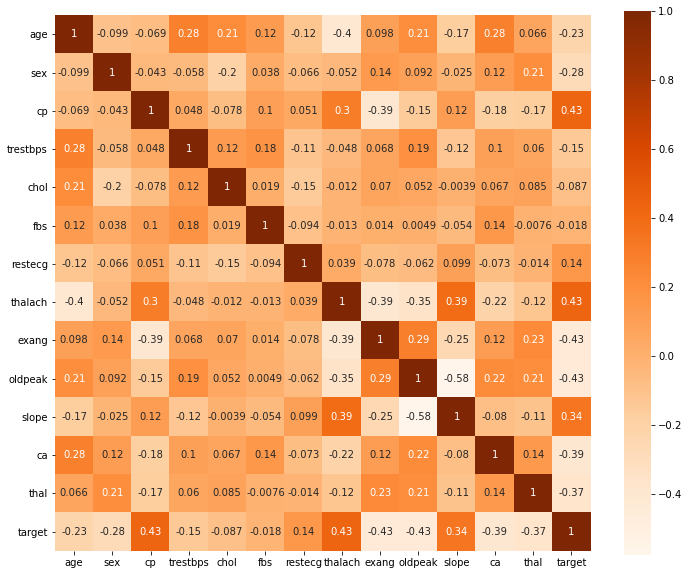

In [12]:
plt.figure(figsize=(12,10))
ht_fig = sns.heatmap(data.corr(), annot=True, cmap='Oranges', square=True);
#ht_fig.figure.savefig('heatmap_figure.png')

In [13]:
data.corr()['target'].sort_values()

exang      -0.432743
oldpeak    -0.430131
ca         -0.394139
thal       -0.365264
sex        -0.276170
age        -0.226722
trestbps   -0.145564
chol       -0.086861
fbs        -0.018382
restecg     0.144427
slope       0.342514
cp          0.430167
thalach     0.430447
target      1.000000
Name: target, dtype: float64

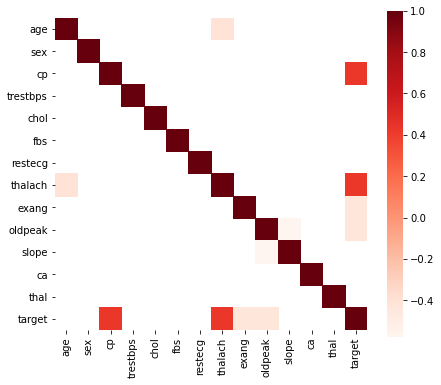

In [14]:
# shows only correlations greater than 0.4 or less than -0.4
mask = (abs(data.corr())<.4)
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(), cmap='Reds', square=True, mask=mask);

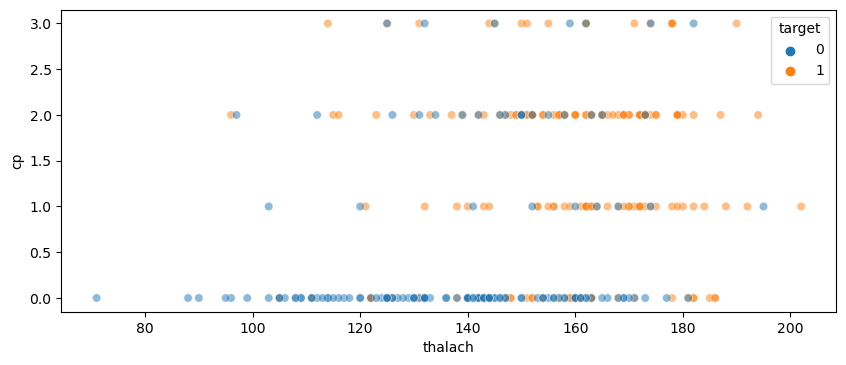

In [15]:
plt.figure(figsize=(10,4), dpi=100)
sns.scatterplot(x='thalach', y='cp', hue='target', data=data, alpha=.5);

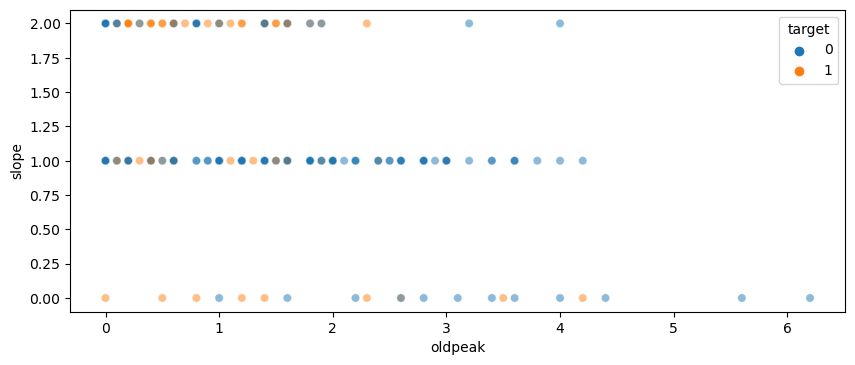

In [16]:
plt.figure(figsize=(10,4), dpi=100)
sns.scatterplot(x='oldpeak', y='slope', hue='target', data=data, alpha=.5);

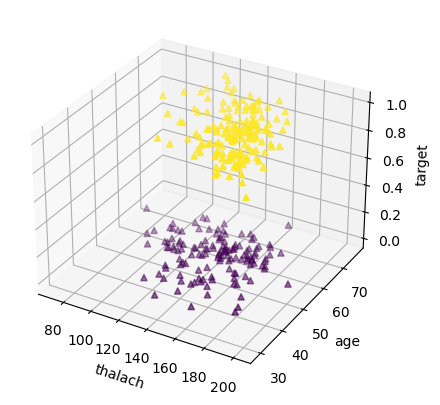

In [18]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(5,5),dpi=100)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['thalach'],data['age'],data['target'],c=data['target'], marker='^')

ax.set_xlabel('thalach')
ax.set_ylabel('age')
ax.set_zlabel('target');

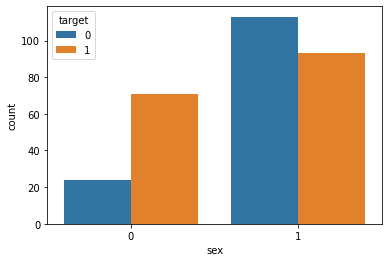

In [19]:
# Target vs Sex
sns.countplot(x='sex', data=data, hue='target');

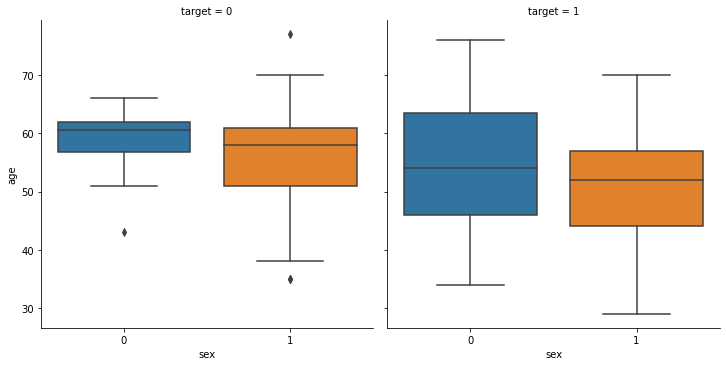

In [20]:
sns.catplot(data=data, x='sex', y='age', col='target', kind='box');

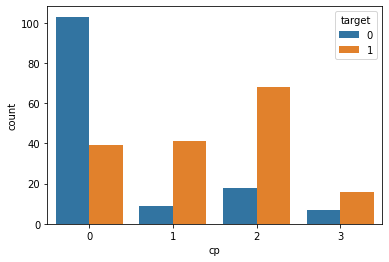

In [21]:
# Target vs cp 
sns.countplot(data=data, x='cp', hue='target');

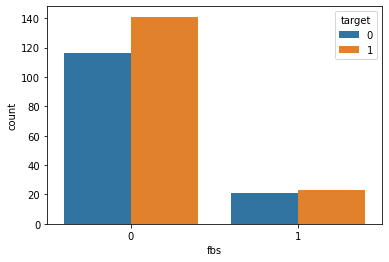

In [22]:
sns.countplot(data=data, x='fbs', hue='target');

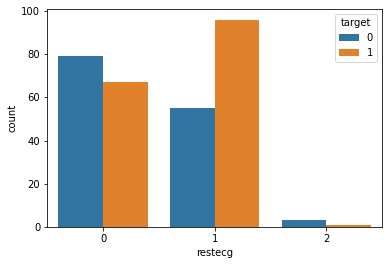

In [23]:
sns.countplot(data=data, x='restecg', hue='target');

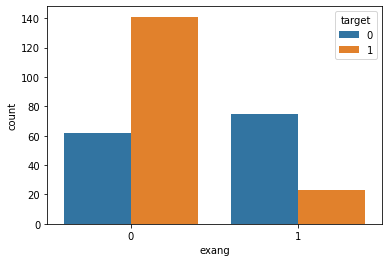

In [24]:
# Target vs Exercise Induced Angina (exang)
sns.countplot(data=data, x='exang', hue='target');

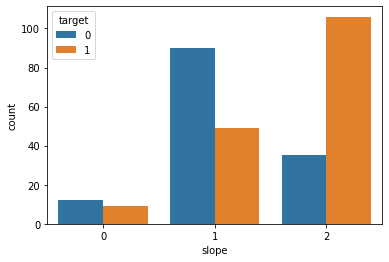

In [25]:
# Target vs Slope
sns.countplot(data=data, x='slope', hue='target');

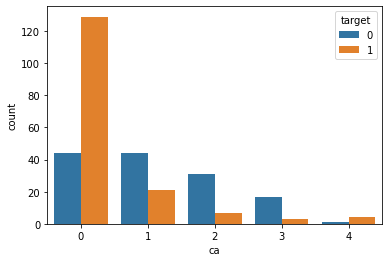

In [26]:
# Target vs Number of major vessels colored by fluoroscopy (ca)
sns.countplot(data=data, x='ca', hue='target');

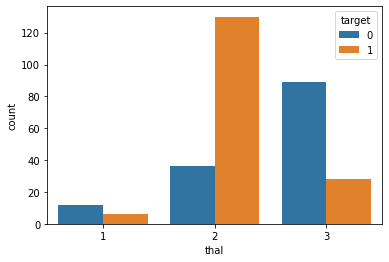

In [27]:
# Target vs Exercise thallium scintigraphic defects
sns.countplot(data=data, x='thal', hue='target');